# Build a model which takes the text review as input and predicts the rating of the review.

## Important Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from tqdm import tqdm, tqdm_notebook
import warnings 
warnings.filterwarnings('ignore')

## Reading the Dataset

In [2]:
review=pd.read_csv(r"C:\Users\91798\Downloads\Sentiment_Analysis.csv",index_col=False)
review.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8
0,0,ProductId: B00813GRG4\n,UserId: A1D87F6ZCVE5NK\n,ProfileName: dll pa\n,HelpfulnessNumerator: 0\n,HelpfulnessDenominator: 0\n,Score: 1\n,Time: 1346976000\n,ReviewSummary: Not as Advertised\n,ReviewText: Product arrived labeled as Jumbo S...
1,1,ProductId: B000LQOCH0\n,UserId: ABXLMWJIXXAIN\n,"ProfileName: Natalia Corres ""Natalia Corres""\n",HelpfulnessNumerator: 1\n,HelpfulnessDenominator: 1\n,Score: 4\n,Time: 1219017600\n,"ReviewSummary: ""Delight"" says it all\n",ReviewText: This is a confection that has been...
2,2,ProductId: B000UA0QIQ\n,UserId: A395BORC6FGVXV\n,ProfileName: Karl\n,HelpfulnessNumerator: 3\n,HelpfulnessDenominator: 3\n,Score: 2\n,Time: 1307923200\n,ReviewSummary: Cough Medicine\n,ReviewText: If you are looking for the secret ...
3,3,ProductId: B006K2ZZ7K\n,UserId: A1UQRSCLF8GW1T\n,"ProfileName: Michael D. Bigham ""M. Wassir""\n",HelpfulnessNumerator: 0\n,HelpfulnessDenominator: 0\n,Score: 5\n,Time: 1350777600\n,ReviewSummary: Great taffy\n,ReviewText: Great taffy at a great price. The...
4,4,ProductId: B006K2ZZ7K\n,UserId: ADT0SRK1MGOEU\n,ProfileName: Twoapennything\n,HelpfulnessNumerator: 0\n,HelpfulnessDenominator: 0\n,Score: 4\n,Time: 1342051200\n,ReviewSummary: Nice Taffy\n,ReviewText: I got a wild hair for taffy and or...


## Data Cleaning & Data Manipulation

In [3]:
review.rename(columns={'0':"ProductId",'1':"UserId",'2':"ProfileName",'3':"HelpfulnessNumerator",'4':'HelpfulnessDenominator','5':'Score','6':'Time','7':'ReviewSummary','8':'ReviewText','Unnamed: 0':'ID'},inplace=True)

In [4]:
review

,ID,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText
0,0,ProductId: B00813GRG4\n,UserId: A1D87F6ZCVE5NK\n,ProfileName: dll pa\n,HelpfulnessNumerator: 0\n,HelpfulnessDenominator: 0\n,Score: 1\n,Time: 1346976000\n,ReviewSummary: Not as Advertised\n,ReviewText: Product arrived labeled as Jumbo S...
1,1,ProductId: B000LQOCH0\n,UserId: ABXLMWJIXXAIN\n,"ProfileName: Natalia Corres ""Natalia Corres""\n",HelpfulnessNumerator: 1\n,HelpfulnessDenominator: 1\n,Score: 4\n,Time: 1219017600\n,"ReviewSummary: ""Delight"" says it all\n",ReviewText: This is a confection that has been...
2,2,ProductId: B000UA0QIQ\n,UserId: A395BORC6FGVXV\n,ProfileName: Karl\n,HelpfulnessNumerator: 3\n,HelpfulnessDenominator: 3\n,Score: 2\n,Time: 1307923200\n,ReviewSummary: Cough Medicine\n,ReviewText: If you are looking for the secret ...
3,3,ProductId: B006K2ZZ7K\n,UserId: A1UQRSCLF8GW1T\n,"ProfileName: Michael D. Bigham ""M. Wassir""\n",HelpfulnessNumerator: 0\n,HelpfulnessDenominator: 0\n,Score: 5\n,Time: 1350777600\n,ReviewSummary: Great taffy\n,ReviewText: Great taffy at a great price. The...
4,4,ProductId: B006K2ZZ7K\n,UserId: ADT0SRK1MGOEU\n,ProfileName: Twoapennything\n,HelpfulnessNumerator: 0\n,HelpfulnessDenominator: 0\n,Score: 4\n,Time: 1342051200\n,ReviewSummary: Nice Taffy\n,ReviewText: I got a wild hair for taffy and or...
...,...,...,...,...,...,...,...,...,...,...
568448,568448,ProductId: B001EO7N10\n,UserId: A28KG5XORO54AY\n,ProfileName: Lettie D. Carter\n,HelpfulnessNumerator: 0\n,HelpfulnessDenominator: 0\n,Score: 5\n,Time: 1299628800\n,ReviewSummary: Will not do without\n,ReviewText: Great for sesame chicken..this is ...
568449,568449,ProductId: B003S1WTCU\n,UserId: A3I8AFVPEE8KI5\n,ProfileName: R. Sawyer\n,HelpfulnessNumerator: 0\n,HelpfulnessDenominator: 0\n,Score: 2\n,Time: 1331251200\n,ReviewSummary: disappointed\n,ReviewText: I'm disappointed with the flavor. ...
568450,568450,ProductId: B004I613EE\n,UserId: A121AA1GQV751Z\n,"ProfileName: pksd ""pk_007""\n",HelpfulnessNumerator: 2\n,HelpfulnessDenominator: 2\n,Score: 5\n,Time: 1329782400\n,ReviewSummary: Perfect for our maltipoo\n,"ReviewText: These stars are small, so you can ..."
568451,568451,ProductId: B004I613EE\n,UserId: A3IBEVCTXKNOH\n,"ProfileName: Kathy A. Welch ""katwel""\n",HelpfulnessNumerator: 1\n,HelpfulnessDenominator: 1\n,Score: 5\n,Time: 1331596800\n,ReviewSummary: Favorite Training and reward tr...,ReviewText: These are the BEST treats for trai...


In [5]:
review.set_index("ID",inplace=True)

In [6]:
review["ProductId"]=[i.split()[1] for i in review["ProductId"]]

In [7]:
review["UserId"]=[i.split()[1] for i in review["UserId"]]

In [8]:
review["ProfileName"]=[i.split()[1] for i in review["ProfileName"]]

In [9]:
review["HelpfulnessNumerator"]=[i.split()[1] for i in review["HelpfulnessNumerator"]]

In [10]:
review["HelpfulnessDenominator"]=[i.split()[1] for i in review["HelpfulnessDenominator"]]

In [11]:
review["Score"]=[i.split()[1] for i in review["Score"]]

In [12]:
review["Time"]=[i.split()[1] for i in review["Time"]]

In [13]:
review["ReviewSummary"]=review["ReviewSummary"].apply(lambda x:x.replace('ReviewSummary:',""))
review["ReviewSummary"]=review["ReviewSummary"].apply(lambda x:x.replace('\n',""))

In [14]:
review["ReviewText"]=review["ReviewText"].apply(lambda x:x.replace('ReviewText:',""))
review["ReviewText"]=review["ReviewText"].apply(lambda x:x.replace('\n',""))

In [15]:
reviews = review.drop_duplicates()

In [16]:
reviews.head()

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText
ID,,,,,,,,,
0,B00813GRG4,A1D87F6ZCVE5NK,dll,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanu...
1,B000LQOCH0,ABXLMWJIXXAIN,Natalia,1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a f...
2,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient ...
3,B006K2ZZ7K,A1UQRSCLF8GW1T,Michael,0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wi...
4,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this ...


In [17]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 568172 entries, 0 to 568452
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   ProductId               568172 non-null  object
 1   UserId                  568172 non-null  object
 2   ProfileName             568172 non-null  object
 3   HelpfulnessNumerator    568172 non-null  object
 4   HelpfulnessDenominator  568172 non-null  object
 5   Score                   568172 non-null  object
 6   Time                    568172 non-null  object
 7   ReviewSummary           568172 non-null  object
 8   ReviewText              568172 non-null  object
dtypes: object(9)
memory usage: 43.3+ MB


In [18]:
reviews["HelpfulnessNumerator"]=reviews["HelpfulnessNumerator"].astype("int64")

In [19]:
reviews["HelpfulnessDenominator"]=reviews["HelpfulnessDenominator"].astype("int64")

In [20]:
reviews["Score"]=reviews["Score"].astype("int64")

In [21]:
senti=[]
for i in reviews.Score:
    if i>3:
        senti.append("positive")
    elif i<3:
        senti.append("negative")
    else:
        senti.append("cannot_say")

In [22]:
reviews["Sentiment"]=senti

In [23]:
pos_review= reviews[reviews["Sentiment"]=="positive"]

In [24]:
neg_review= reviews[reviews["Sentiment"]=="negative"]

In [25]:
review.head()

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText
ID,,,,,,,,,
0,B00813GRG4,A1D87F6ZCVE5NK,dll,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanu...
1,B000LQOCH0,ABXLMWJIXXAIN,Natalia,1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a f...
2,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient ...
3,B006K2ZZ7K,A1UQRSCLF8GW1T,Michael,0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wi...
4,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this ...


### DISTRIBUTION OF RATING

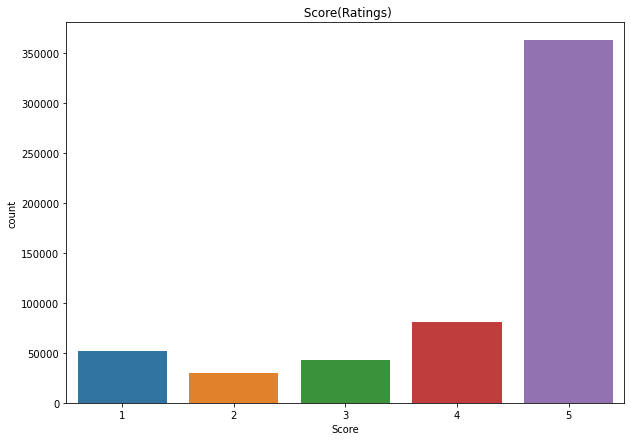

In [26]:
plt.figure(figsize=(10,7))
sns.countplot(x='Score',data=reviews)
plt.title(' Score(Ratings)')
plt.show()

### Popular words in Positive Reviews (4-5 Rating)

In [27]:
stopwords1=set(STOPWORDS)

100%|███████████████████████████████████████████████████████████████████████| 443562/443562 [00:04<00:00, 94344.40it/s]


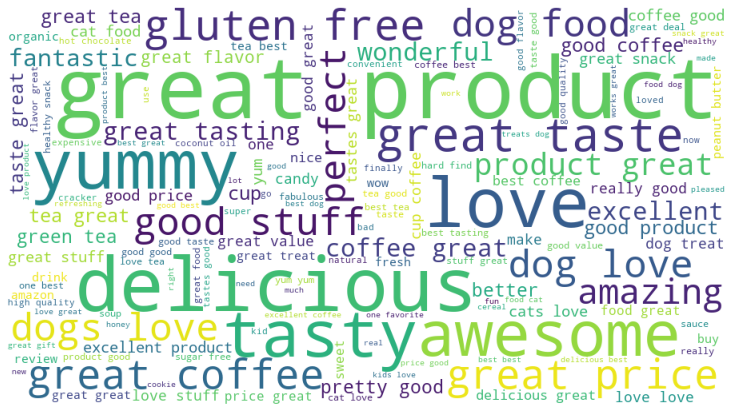

In [28]:
words_corpus_pos = ''
for val in tqdm(pos_review['ReviewSummary']):
    text = str(val).lower()
    tokens = text.split()
    tokens = [word for word in tokens if word not in stopwords1]
    words_corpus_pos += ' '.join(tokens) + " "
    
wordcloud = WordCloud(width = 900, height = 500,
                background_color ='white',
                min_font_size = 10).generate(words_corpus_pos)    
    
plt.figure(figsize = (10, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

### Popular words in Negative Reviews (1-2 Rating)

100%|██████████████████████████████████████████████████████████████████████████| 81996/81996 [01:09<00:00, 1186.36it/s]


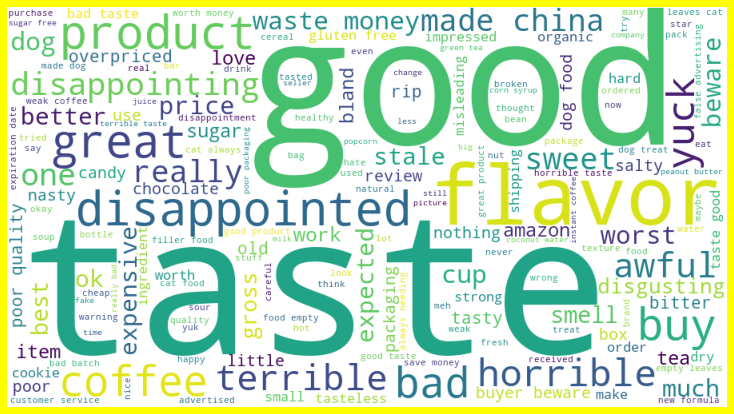

In [94]:
words_corpus_neg = ''
for val in tqdm(neg_review['ReviewSummary']):
    text = str(val).lower()
    tokens = text.split()
    tokens = [word for word in tokens if word not in stopwords1]
    words_corpus_neg += ' '.join(tokens) + " "
    
wordcloud = WordCloud(width = 900, height = 500,
                background_color ='white',
                min_font_size = 10).generate(words_corpus_neg)    
    
plt.figure(figsize = (10, 8), facecolor = 'yellow')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [30]:
# nltk.download('punkt')

## Helpfulness 

In [31]:
reviews['usefulness'] = reviews['HelpfulnessNumerator']/reviews['HelpfulnessDenominator']

In [32]:
usefulness = []
for i in reviews['usefulness']:
    if i > 0.75:
        usefulness.append(">75%")
    elif i < 0.25:
        usefulness.append("<25%")
    elif i >= 0.25 and i <= 0.75:
        usefulness.append("25-75%")
    else:
        usefulness.append("useless")
reviews['usefulness']  = usefulness  

In [33]:
word_count = []
for i in reviews['ReviewText']:
    word_count.append(len(i.split()))
reviews['word_count'] = word_count 

## Distribution of Helpfulness

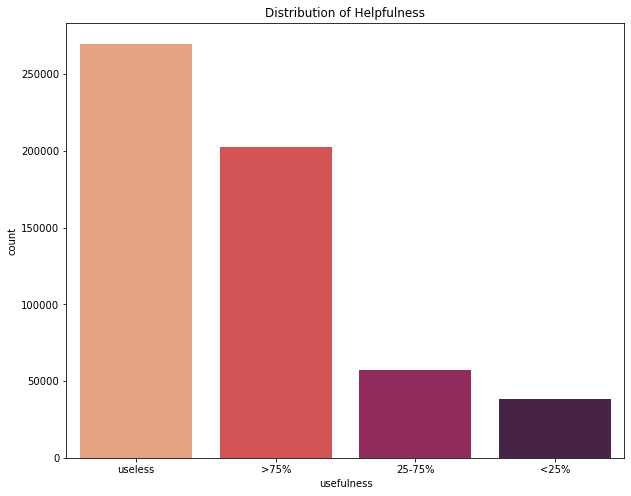

In [34]:
plt.figure(figsize=(10,8))
sns.countplot(x='usefulness',data=reviews,order=['useless','>75%','25-75%','<25%'],palette="rocket_r")
plt.title('Distribution of Helpfulness')
plt.show()

## Rating Affect Helpfulness

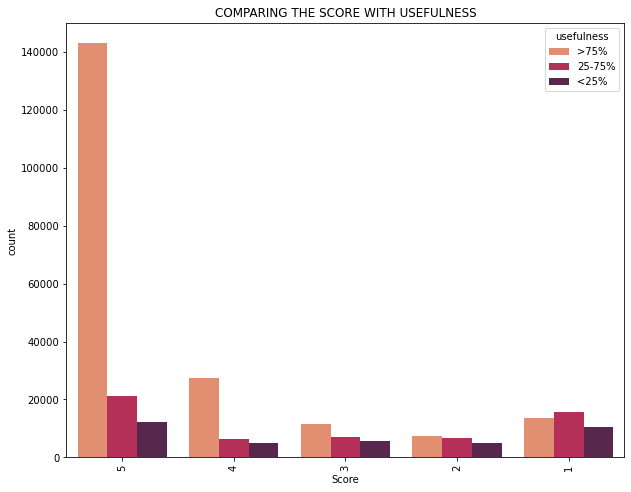

In [35]:
plt.figure(figsize=(10,8))
sns.countplot(x='Score',data=reviews,hue='usefulness',hue_order=['>75%','25-75%','<25%'],order=[5,4,3,2,1],palette="rocket_r")
plt.xticks(rotation=90,fontsize=10)
plt.title('COMPARING THE SCORE WITH USEFULNESS')
plt.show()

## Word count varying by Rating

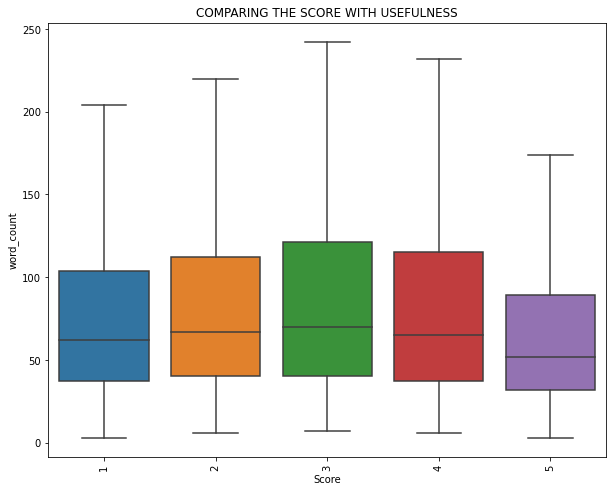

In [36]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Score',y='word_count',data=reviews,showfliers=False)
plt.xticks(rotation=90,fontsize=10)
plt.title('COMPARING THE SCORE WITH USEFULNESS')
plt.show()

## Reading the data and removing unwanted columns

In [37]:
#Dropping the unwanted columns from our data frame.
reviews.drop("ProductId", inplace=True, axis=1)
reviews.drop("ProfileName", inplace=True, axis=1)
reviews.drop("HelpfulnessNumerator", inplace=True, axis=1)
reviews.drop("HelpfulnessDenominator", inplace=True, axis=1)
reviews.drop("Time", inplace=True, axis=1)
reviews.drop("Sentiment", inplace=True, axis=1)
reviews.drop("usefulness", inplace=True, axis=1)
reviews.drop("word_count", inplace=True, axis=1)
reviews.head()

,UserId,Score,ReviewSummary,ReviewText
ID,,,,
0,A1D87F6ZCVE5NK,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanu...
1,ABXLMWJIXXAIN,4,"""Delight"" says it all",This is a confection that has been around a f...
2,A395BORC6FGVXV,2,Cough Medicine,If you are looking for the secret ingredient ...
3,A1UQRSCLF8GW1T,5,Great taffy,Great taffy at a great price. There was a wi...
4,ADT0SRK1MGOEU,4,Nice Taffy,I got a wild hair for taffy and ordered this ...


In [38]:
lst=[]
for i in reviews["Score"]:
    if i<3:
        lst.append(0)
    elif i>3:
        lst.append(1)
    else:
        lst.append(i)
reviews["Score"]=lst

In [39]:
reviews["Score"].head()

ID
0    0
1    1
2    0
3    1
4    1
Name: Score, dtype: int64

In [40]:
reviews.Score.unique()

array([0, 1, 3], dtype=int64)

# Train Test Split

In [41]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(reviews, test_size = 0.3)

In [42]:
train.head()

,UserId,Score,ReviewSummary,ReviewText
ID,,,,
322465,A1W6N0T1FPJ4DR,0,Yuck. Just yuck.,This is the third flavor of St. Dalfour's gou...
141556,A25532TZH4F43G,1,Very Good,This is a great tasting coffee. Not only good...
108320,A2UPPLL368TXRJ,0,Not unique,I read many reviews before buying both Jet Fu...
151398,AJ6ZYWQ5C2RSX,0,This is not pure,I have baked with this organic vanilla in the...
559286,A12JQNDSRZGCYC,1,Great little chip,Bought these to try with our new eating life ...


In [43]:
# Removing all rows where 'Score' is equal to 3
train = train[train.Score != 3]
test = test[test.Score != 3]

In [44]:
print(train.shape)
print(test.shape)

(367887, 4)
(157671, 4)


## Text Preprocessing

In [45]:
#Taking the 'Text' column in seperate list for further 
#text preprocessing.
lst_text = train['ReviewText'].tolist()
test_text = test['ReviewText'].tolist()

## Converting to Lower-case

In [46]:
#Converting the whole list to lower-case.
lst_text = [str(item).lower() for item in lst_text]
test_text = [str(item).lower() for item in test_text]

## Removing HTML Tags from strings

In [48]:
#Lets now remove all HTML tags from the list of strings.
import re
def striphtml(data):
    p = re.compile(r'<.*?>')
    return p.sub('', data)

for i in tqdm(range(len(lst_text))):
    lst_text[i] = striphtml(lst_text[i])

100%|███████████████████████████████████████████████████████████████████████| 367887/367887 [00:08<00:00, 45828.96it/s]


In [49]:
for i in tqdm(range(len(test_text))):
    test_text[i] = striphtml(test_text[i])

100%|███████████████████████████████████████████████████████████████████████| 157671/157671 [00:04<00:00, 33124.26it/s]


## Removing Special Characters from strings

In [53]:
#Now we will remove all special characters from the strings.
for i in tqdm(range(len(lst_text))):
    lst_text[i] = re.sub(r'[^A-Za-z]+', ' ', lst_text[i])

100%|███████████████████████████████████████████████████████████████████████| 367887/367887 [00:11<00:00, 30730.30it/s]


In [54]:
for i in tqdm(range(len(test_text))):
    test_text[i] = re.sub(r'[^A-Za-z]+', ' ', test_text[i])
#     print(test_text[i])

100%|███████████████████████████████████████████████████████████████████████| 157671/157671 [00:05<00:00, 30134.18it/s]


## Removing Stopwords / Stemming / Lemmatizing

In [55]:
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [56]:
## initialise the inbuilt Stemmer
stemmer = PorterStemmer()

In [57]:
## We can also use Lemmatizer instead of Stemmer
lemmatizer = WordNetLemmatizer()

## Stemming / Lemmatizing on Test Features

In [58]:
stemmed_test_text=[]
for val in tqdm(test_text):
    tokens = val.split()
    clean_tokens_test_text=[]
    for word in tokens:
        if word not in stopwords1:
            clean_tokens_test_text.append(str(stemmer.stem(word)))
    stemmed_test_text.append(' '.join(clean_tokens_test_text))  

100%|████████████████████████████████████████████████████████████████████████| 157671/157671 [02:33<00:00, 1025.99it/s]


In [59]:
# stemmed_test_text

In [60]:
lemmatized_test_text=[]
for val in tqdm(test_text):
    tokens = val.split()
    clean_tokens_test_text1=[]
    for word in tokens:
        if word not in stopwords1:
            clean_tokens_test_text1.append(str(lemmatizer.lemmatize(word)))
    lemmatized_test_text.append(' '.join(clean_tokens_test_text1))

100%|████████████████████████████████████████████████████████████████████████| 157671/157671 [00:35<00:00, 4399.68it/s]


In [61]:
# nltk.download('wordnet')

In [62]:
# lemmatized_test_text

## Stemming / Lemmatizing on Train Features

In [63]:
stemmed_train_text=[]
for val in tqdm(lst_text):
    tokens = val.split()
    clean_tokens_lst_text=[]
    for word in tokens:
        if word not in stopwords1:
            clean_tokens_lst_text.append(str(stemmer.stem(word)))
    stemmed_train_text.append(' '.join(clean_tokens_lst_text)) 

100%|████████████████████████████████████████████████████████████████████████| 367887/367887 [06:04<00:00, 1008.25it/s]


In [64]:
# stemmed_lst_text

In [65]:
lemmatized_train_text=[]
for val in tqdm(lst_text):
    tokens = val.split()
    clean_tokens_lst_text=[]
    for word in tokens:
        if word not in stopwords1:
            clean_tokens_lst_text.append(str(lemmatizer.lemmatize(word)))
    lemmatized_train_text.append(' '.join(clean_tokens_lst_text))

100%|████████████████████████████████████████████████████████████████████████| 367887/367887 [01:19<00:00, 4649.68it/s]


In [66]:
X_train=pd.DataFrame({"stemmed_train_text":stemmed_train_text,"lemmatized_train_text":lemmatized_train_text})

In [67]:
X_train.head()

,stemmed_train_text,lemmatized_train_text
0,third flavor st dalfour s gourmet go tri first...,third flavor st dalfour s gourmet go tried fir...
1,great tast coffe good first thing morn anytim ...,great tasting coffee good first thing morning ...
2,read mani review buy jet fuel black tiger real...,read many review buying jet fuel black tiger r...
3,bake organ vanilla past realiz quot pure quot ...,baked organic vanilla past realized quot pure ...
4,bought tri new eat life style proven great lit...,bought try new eating life style proven great ...


In [68]:
X_test=pd.DataFrame({"stemmed_test_text":stemmed_test_text,"lemmatized_test_text":lemmatized_test_text})

In [69]:
X_test.head()

,stemmed_test_text,lemmatized_test_text
0,bought effort help quit smoke watch weight d l...,bought effort help quit smoking watching weigh...
1,excel product great tast perfect portion calor...,excellent product great taste perfect portion ...
2,want post found small bit plastic food feed mo...,wanted post found small bit plastic food feedi...
3,twine english breakfast tea fairli strong blac...,twinings english breakfast tea fairly strong b...
4,now understand someth bonsai basic e treat out...,now understand something bonsai basic e treat ...


## Vectorizing our dataset

In [70]:
from sklearn.feature_extraction.text import CountVectorizer

vocab = CountVectorizer()
X_train_bow = vocab.fit_transform(lemmatized_train_text)

In [71]:
X_train_bow

<367887x94088 sparse matrix of type '<class 'numpy.int64'>'
	with 11798561 stored elements in Compressed Sparse Row format>

In [72]:
# transform testing data (using fitted vocabulary) into a document-term matrix
X_test_bow = vocab.transform(lemmatized_test_text)
X_test_bow

<157671x94088 sparse matrix of type '<class 'numpy.int64'>'
	with 5018821 stored elements in Compressed Sparse Row format>

# Building and evaluating the model

## Logistic Regression

In [73]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_bow, train.Score)

LogisticRegression()

In [74]:
y_train_pred = classifier.predict(X_train_bow)

In [75]:
from sklearn.metrics import accuracy_score, classification_report

print(accuracy_score(train.Score, y_train_pred))

0.9495660352227722


In [76]:
y_test_pred = classifier.predict(X_test_bow)

### Evaluation Metrics

In [77]:
from sklearn.metrics import accuracy_score, classification_report

print(accuracy_score(test.Score, y_test_pred))

0.9363104185297233


In [78]:
print(classification_report(test.Score, y_test_pred))

              precision    recall  f1-score   support

           0       0.85      0.72      0.78     24687
           1       0.95      0.98      0.96    132984

    accuracy                           0.94    157671
   macro avg       0.90      0.85      0.87    157671
weighted avg       0.93      0.94      0.93    157671



## Naive Bayes Classifier

In [79]:
# import and instantiate a Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [80]:
%time nb.fit(X_train_bow, train.Score)

Wall time: 251 ms


MultinomialNB()

In [81]:
y_train_pred_class_nb = nb.predict(X_train_bow)

In [82]:
# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(train.Score, y_train_pred_class_nb)

0.9183444916509689

In [83]:
# make class predictions for X_test_dtm
y_pred_class_nb = nb.predict(X_test_bow)

### Evaluation Metrics

In [84]:
# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(test.Score, y_pred_class_nb)

0.9125267170246907

In [85]:
# print the confusion matrix
con_metrics_nb = metrics.confusion_matrix(test.Score, y_pred_class_nb)
con_metrics_nb

array([[ 17065,   7622],
       [  6170, 126814]], dtype=int64)

In [86]:
#Checking Precision, Recall and F1 Score
print(metrics.classification_report(test.Score, y_pred_class_nb))

              precision    recall  f1-score   support

           0       0.73      0.69      0.71     24687
           1       0.94      0.95      0.95    132984

    accuracy                           0.91    157671
   macro avg       0.84      0.82      0.83    157671
weighted avg       0.91      0.91      0.91    157671



##  Decision Tree Classifier

In [87]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
%time tree.fit(X_train_bow, train.Score)

Wall time: 15h 8min 26s


DecisionTreeClassifier()

In [88]:
y_train_pred_class_nb = nb.predict(X_train_bow)

In [89]:
metrics.accuracy_score(train.Score, y_train_pred_class_nb)

0.9183444916509689

In [90]:
# make class predictions for X_test_dtm
y_pred_class_nb = tree.predict(X_test_bow)

### Evaluation Metrics

In [91]:
metrics.accuracy_score(test.Score, y_pred_class_nb)

0.9109411369243552

In [92]:
# print the confusion matrix
con_metrics_nb = metrics.confusion_matrix(test.Score, y_pred_class_nb)
con_metrics_nb

array([[ 16945,   7742],
       [  6300, 126684]], dtype=int64)

In [93]:
#Checking Precision, Recall and F1 Score
print(metrics.classification_report(test.Score, y_pred_class_nb))

              precision    recall  f1-score   support

           0       0.73      0.69      0.71     24687
           1       0.94      0.95      0.95    132984

    accuracy                           0.91    157671
   macro avg       0.84      0.82      0.83    157671
weighted avg       0.91      0.91      0.91    157671

